In [33]:
import seaborn as sns
import pandas as pd

In [28]:
#Aykırı Gözlem Analizi

In [5]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])#int ve float değerleri alır
df = df.dropna()#eksik değer siler
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<AxesSubplot:xlabel='table'>

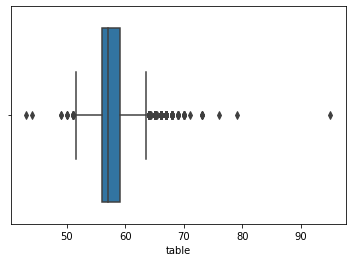

In [7]:
sns.boxplot(x = df_table)

In [8]:
#eşik değer belirlicez

In [9]:
q1 = df_table.quantile(0.25)
q3 = df_table.quantile(0.75)

In [10]:
iqr = (q3-q1) * 1.5

In [15]:
alt_sinir = q1 - iqr 
ust_sinir = q3 + iqr
print("Alt Sınır:" + str(alt_sinir))
print("Ust Sınır:" + str(ust_sinir))

Alt Sınır:51.5
Ust Sınır:63.5


In [16]:
(df_table < alt_sinir)|(df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [24]:
aykiri1 = (df_table < alt_sinir) 
aykiri2 = (df_table > ust_sinir)

In [25]:
df_table[aykiri2]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [26]:
df_table[aykiri1]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [27]:
df_table[aykiri1].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

In [29]:
# Aykırı Değer Problemini Çözmek

In [ ]:
#1-)Silme

In [34]:
df_table = pd.DataFrame(df_table)

In [41]:
t_df = df_table[ ~ ((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis = 1)]#tilda koşulları sağlamayanları al

In [39]:
t_df#temiz olanları t_df içine aldık

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [42]:
#2-)Ortalama İle Doldurma

In [43]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [44]:
df_table = df["table"]

In [45]:
aykiri1.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [49]:
df_table[aykiri1]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [50]:
df_table.mean()

57.45718390804598

In [51]:
df_table[aykiri1] = df_table.mean()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_table[aykiri1]#aykırı değerleri silmeyip ortalama değerle değiştirmek

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [53]:
#3-)Baskılama Yöntemi

In [54]:
#aykırılar yakalandıktan sonra alt sınırın altındakiler alt sınıra üst sınır üstündekiler üst sınıra eşitlenir

In [56]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [60]:
df_table = df["table"]

In [65]:
df_table[aykiri1]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [63]:
alt_sinir

51.5

In [64]:
ust_sinir

63.5

In [67]:
df_table[aykiri1] = alt_sinir

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df_table[aykiri1]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64